In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Plot data-points with matplotlib

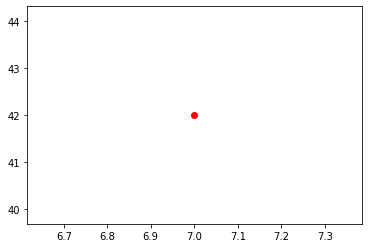

In [2]:
# Plot single point
# 1st, create a figure
fig = plt.figure()
# then create an 'ax' in this figure
ax = fig.add_subplot(111)
# plot red point at x=7, y=42
ax.scatter([7], [42], color = 'red')
plt.show()

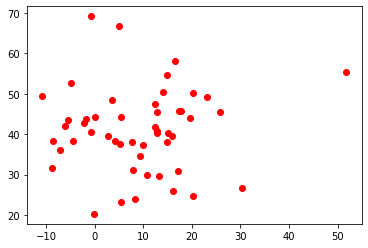

In [3]:
# Plot multiple points
# create a center
center = (7, 42)
# sample scaled normal distribution
datapoints = 10 * np.random.randn(50, 50)
# re-center data
datapoints[0, :] += center[0]
datapoints[1, :] += center[1]
# plot red point for every data-point
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datapoints[0, :], datapoints[1, :], color = 'red')
plt.show()



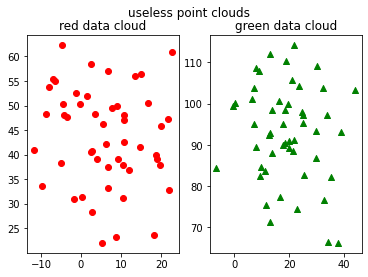

In [4]:
# Use colors, legend and title

# Data-cloud1
# -----------
# create a center
center1 = (7, 42)
# sample scaled normal distribution
datacloud1 = 10 * np.random.randn(50, 50)
# re-center data
datacloud1[0, :] += center1[0]
datacloud1[1, :] += center1[1]

# Data-cloud2
# -----------
# create a center
center2 = (18, 92)
# sample scaled normal distribution
datacloud2 = 10 * np.random.randn(50, 50)
# re-center data
datacloud2[0, :] += center2[0]
datacloud2[1, :] += center2[1]

fig, ax = plt.subplots(1, 2)

# plot data cloud1 with red points

ax[0].scatter(datacloud1[0, :], datacloud1[1, :], color = 'red')

# plot data cloud2 with green triangles

ax[1].scatter(datacloud2[0, :], datacloud2[1, :], color = 'green', marker = '^')

# data cloud1 is called "red data cloud"
ax[0].set_title('red data cloud')
# data cloud2 is called "green data cloud"
ax[1].set_title('green data cloud')
# title of the plot should be "useless point clouds"
fig.suptitle('useless point clouds')
plt.show()


# Plot curves with matplotlib

Text(0, 0.5, 'Y')

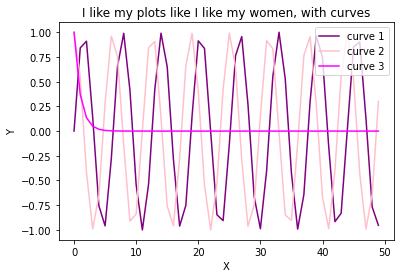

In [5]:
# Some functions
curve1 = np.sin(np.arange(50))
curve2 = np.cos(np.arange(50))
curve3 = np.exp(-np.arange(50))

# plot functions
# colors, labels, title, legends...
plt.plot(curve1, color = 'purple', label = 'curve 1')
plt.plot(curve2, color = 'pink', label = 'curve 2')
plt.plot(curve3, color = 'magenta', label = 'curve 3')

plt.legend(loc = 'best')
plt.title('I like my plots like I like my women, with curves')

plt.xlabel('X')
plt.ylabel('Y')

## Let's use some real data

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

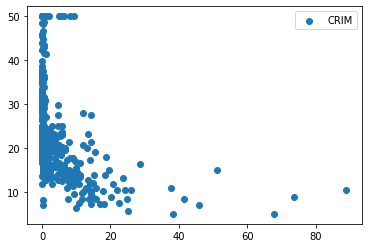

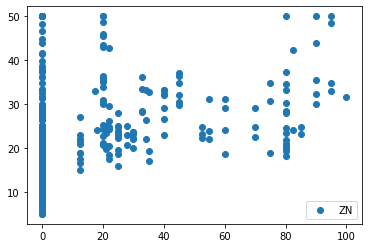

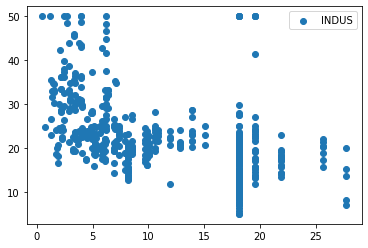

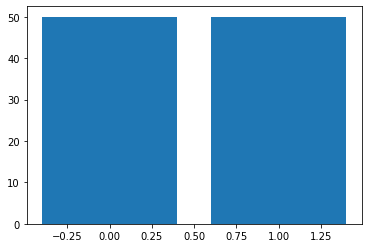

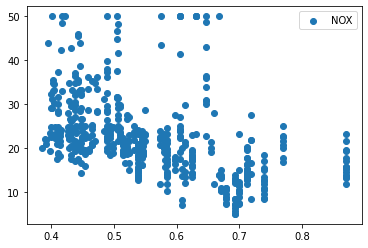

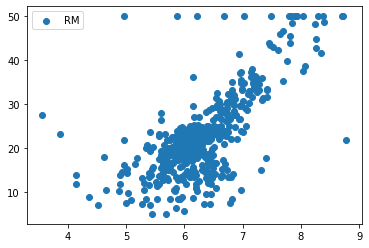

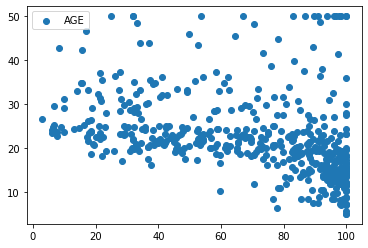

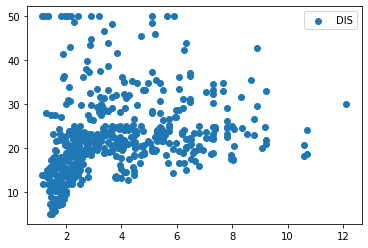

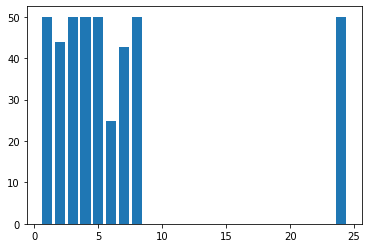

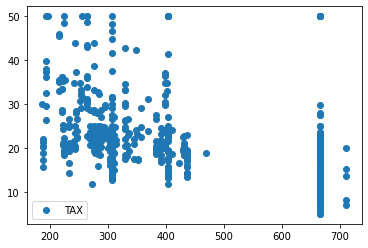

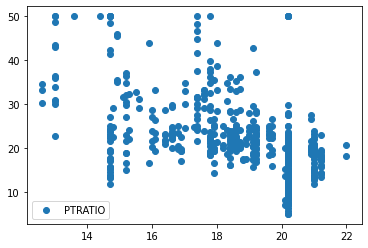

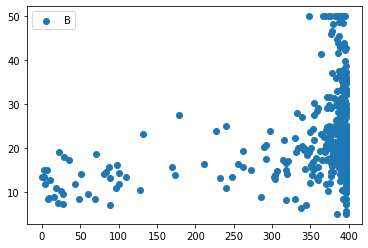

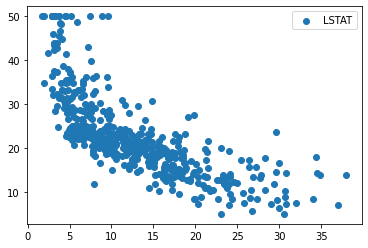

In [24]:
from sklearn import datasets
boston = datasets.load_boston()

boston_df = pd.DataFrame(boston.data, columns = list(boston.feature_names))
boston_df['price'] = list(boston.target)

for feature in list(boston.feature_names):
  if len(np.unique(boston_df[feature])) > 10: # scatter plot for continous variables
    fig = plt.figure()
    plt.scatter(boston_df[feature], boston_df['price'], label = feature)
    plt.legend()
    plt.show()
  else: # bar chart for categoricals
    plt.bar(boston_df[feature], boston_df['price'], label = feature)
           

# # check the following attributes of boston:
# # - boston.target (prices)

# print(boston.target)

# # - boston.feature_names (name of descriptor's components)
# print(boston.feature_names)

# # - boston.data (values of each feature for each house in the dataset)
# print(boston.data)

# # Plot a curve price = f(feature) for every feature in the dataset
# fig = plt.figure()
# for i in range(len(boston.feature_names)):
#     plt.plot(boston.data[i], boston.target, label = boston.feature_names[i])
# plt.legend()
# plt.show()

# # titles and named axes plz
# # You might need np.argsort at some point...
    

# Read data from files with pandas and plot with seaborn

In [7]:
import pandas as pd
import seaborn as sns

### Machine learning, experiment monitoring

In [26]:
# read csv file with pandas
# csv file: euclidean_training.csv
data = pd.read_csv("euclidean_training.csv")

In [27]:
# print the resulting dataframe
data

Unnamed: 0  accuracies  epochs  distance parameter  experiment
0             0    0.696591       0  0.042117     k=0,5           0
1             1    0.851136       1  0.044463     k=0,5           0
2             2    0.896591       2  0.046504     k=0,5           0
3             3    0.912500       3  0.047552     k=0,5           0
4             4    0.922727       4  0.048296     k=0,5           0
..          ...         ...     ...       ...       ...         ...
635          15    0.923864      15  0.054504     k=0,6           7
636          16    0.923864      16  0.054335     k=0,6           7
637          17    0.923864      17  0.054138     k=0,6           7
638          18    0.925000      18  0.054009     k=0,6           7
639          19    0.924432      19  0.053821     k=0,6           7

[640 rows x 6 columns]

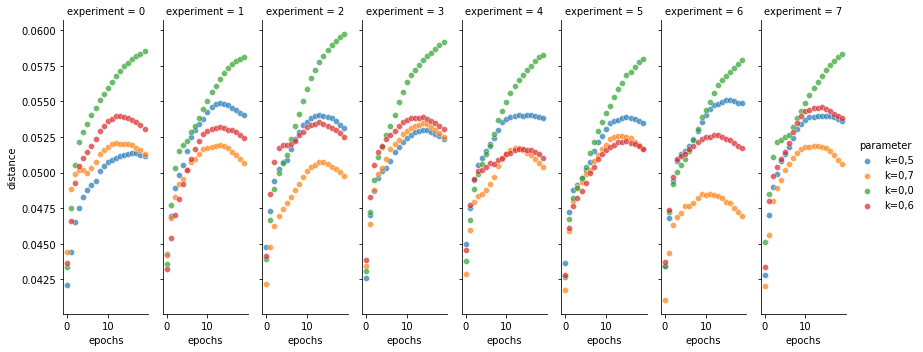

In [28]:
# create the matplotlib object
#fig, ax = plt.subplots(figsize=(8, 8))
# plot with sns
# plot distance = f(epochs)
# one color = one value of parameter k
# for every value of k, multiple experiments were run 
# (i.e. multiple curves distance=f(epochs) exist)
# seaborn plots the average with transparency for dispersion


#plt.figure(figsize=(20, 50))

# Change seaborn plot size

#g = sns.FacetGrid(data, hue="parameter", height=10, aspect=1) #, col="parameter"
#sns.set(rc = {'figure.figsize':(30,30)})
g = sns.FacetGrid(data, col="experiment", hue="parameter", height=5, aspect=0.3) #, col="parameter"
g.map(sns.scatterplot, "epochs", "distance", alpha=.7)

g.add_legend()

# Plot geographical data

In [ ]:
# !pip install smopy

In [15]:
import os, ssl
import smopy
from matplotlib import pyplot as plt
import numpy as np
import json

# The following might be unnecessary (or even produce an error...)
# comment if necessary
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [16]:
# Here is a convenient object to create maps (geographical).
class Map(object):
    def __init__(self, latmin, latmax, longmin, longmax, zoom):
        self.latmin = latmin
        self.latmax = latmax
        self.longmin = longmin
        self.longmax = longmax
        self.zoom = zoom
        self.smopymap = smopy.Map((latmin, latmax, longmin, longmax), z=zoom)
    
    def get_image(self):
        return np.array(self.smopymap.img)
    
    def to_image_pixels(self, lat, long):
        return [int(k) for k in self.smopymap.to_pixels(lat, long)]
    

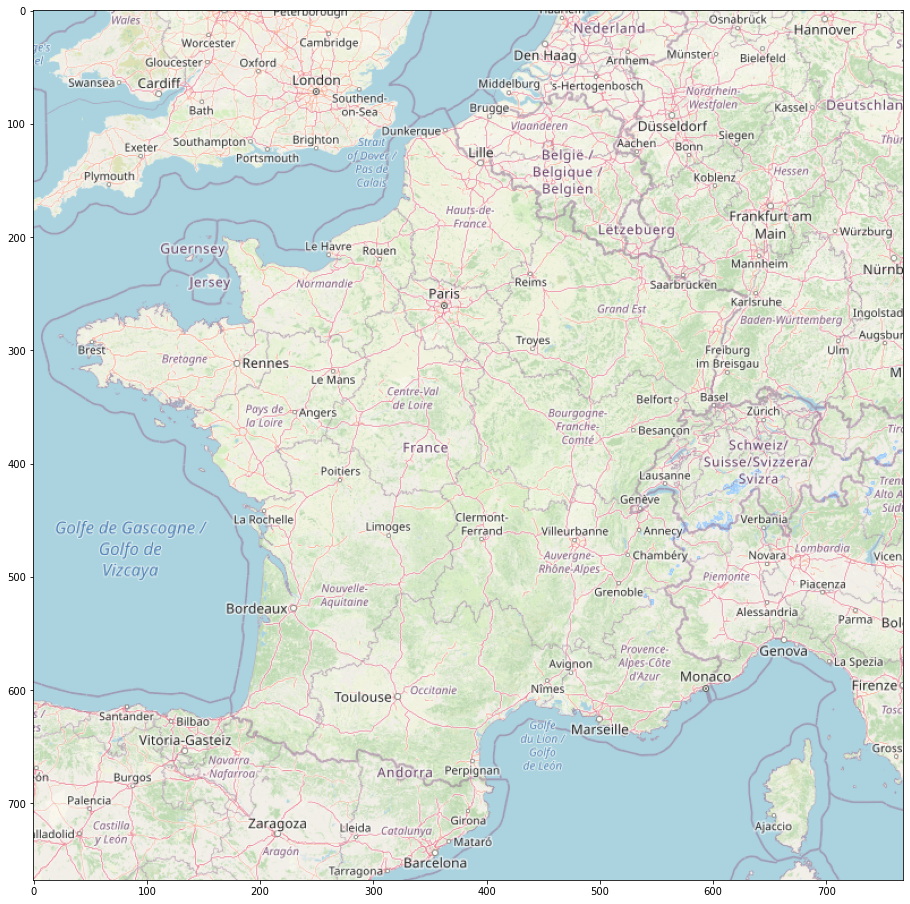

In [70]:
# plot an image with matplotlib
my_map = Map(45., -1., 48.9, 5.5, 6)
image = my_map.get_image()
# create figure
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax
ax.imshow(image)

(768, 768, 3)
362 260


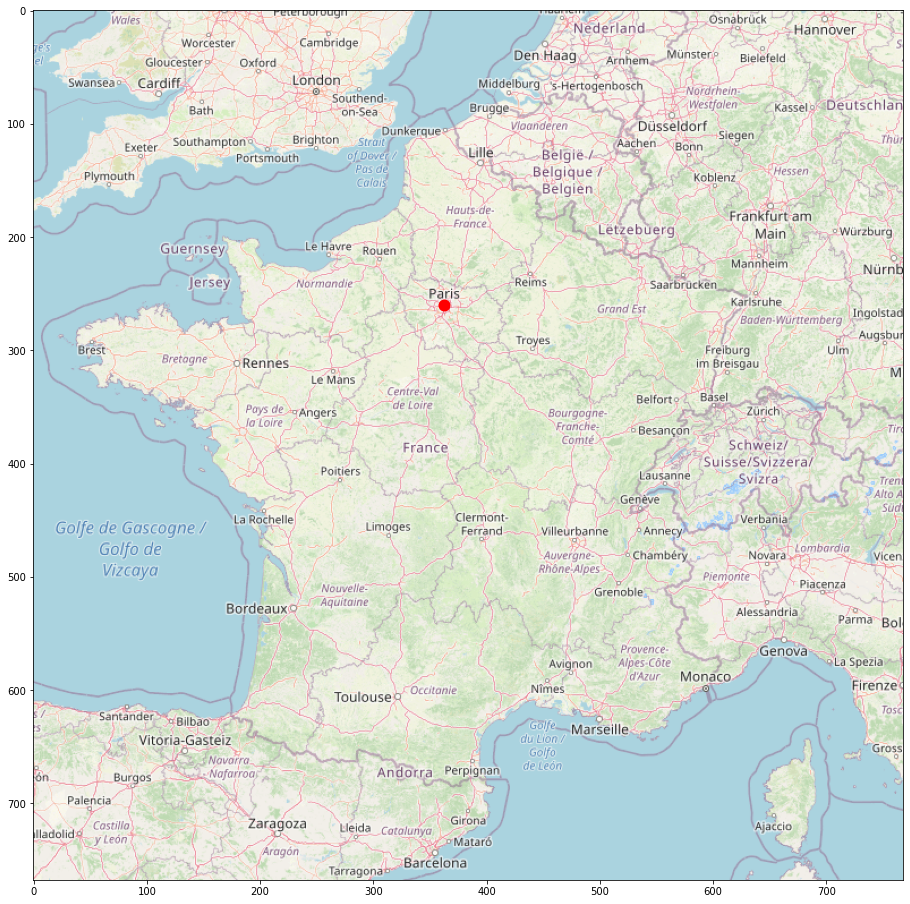

In [54]:
# show image structure
print(image.shape)
# change color of a pixel in the image
Paris_latitude = 48.86151
Paris_longitude = 2.33474
x, y = my_map.to_image_pixels(Paris_latitude, Paris_longitude)
print(x, y)
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax with a red circle placed on Paris
ax.imshow(image)
ax.plot(x, y, 'or', ms=10, mew=2)
plt.show()

In [55]:
# load a json file
with open("fr-esr-principaux-etablissements-enseignement-superieur.json", "r") as f:
    data = json.load(f)

# fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
# ax = fig.add_subplot(111)
# show image on the ax
# plot schools with circles
# set a different color/shape for 'artistique', 'ingenieur' and 'commerce' labels
...
# Deserializing the json object


Ellipsis

In [56]:
# number of schools
ecole  = int(len(data))

In [57]:
data[23]

{'datasetid': 'fr-esr-principaux-etablissements-enseignement-superieur',
 'fields': {'aca_id': 'A12',
  'aca_nom': 'Nancy-Metz',
  'adresse_uai': '6 RUE MARCONI',
  'code_postal_uai': '57070',
  'com_code': '57463',
  'com_nom': 'Metz',
  'coordonnees': [49.10042, 6.21616],
  'dep_id': 'D057',
  'dep_nom': 'Moselle',
  'element_wikidata': 'https://www.wikidata.org/entity/Q3578417',
  'localite_acheminement_uai': 'METZ',
  'numero_telephone_uai': '0387764450',
  'pays_etranger_acheminement': 'France',
  'reg_id': 'R44',
  'reg_nom': 'Grand Est',
  'sigle': 'ESITC Metz',
  'type_d_etablissement': "École d'ingénieurs",
  'uai': '0573389Z',
  'uo_lib': "École supérieure d'ingénieurs des travaux de la construction de Metz",
  'url': 'http://www.esitc-metz.com/',
  'uucr_id': 'UU57701',
  'uucr_nom': 'Metz'},
 'geometry': {'coordinates': [6.21616, 49.10042], 'type': 'Point'},
 'record_timestamp': '2020-01-23T18:27:58.455+01:00',
 'recordid': '51f86c1f1b7718008fdc2b55f9e8db988acb9c3e'}

In [58]:
# We need to learn first how to deal wiht JSON objects
# creating a dataframe containing the name of the data[i]s, the coordinates, and the 
# Each elelement inside the data set is in itsel a dictionary
# Converting into data frame


x_cor = []
y_cor = []
label = []
name = []
for i in range(1,len(data)):
    try:
        # Storing the latitud
        x_cor.append(data[i]['geometry']['coordinates'][1])
        # Storing the longitud
        y_cor.append(data[i]['geometry']['coordinates'][0])
        label.append(data[i]['fields']['type_d_etablissement'])
        name.append(data[i]['fields']['uo_lib'])
    except:
        x_cor.append('NaN')
        # Storing the longitud
        y_cor.append('NaN')
        label.append('NaN')
        name.append('NaN')
    

In [59]:
schools_info = pd.DataFrame()
schools_info['x_cor'] = x_cor
schools_info['y_cor'] = y_cor 
schools_info['label'] = label 
schools_info['name'] = name 


In [60]:
label_2 = []
for label in range(0,len(schools_info['label'])):
    if 'com' in schools_info['label'][label].lower() :
        label_2.append('commerce')
    elif 'ing' in  schools_info['label'][label].lower() :
        label_2.append('ingenieur')
    elif 'ar' in  schools_info['label'][label].lower() :
        label_2.append('artistique')
    else :
       label_2.append('sans label')

In [61]:
schools_info['label_2'] = label_2

In [62]:
# There are several schools that could not be identified
schools_info.groupby(label_2).count()

x_cor  y_cor  label  name  label_2
artistique     50     50     50    50       50
commerce       25     25     25    25       25
ingenieur      67     67     67    67       67
sans label    179    179    179   179      179

In [63]:
schools_info =  pd.DataFrame(schools_info[schools_info.x_cor != 'NaN'])

In [ ]:
#for element in schools_info['x_cor']:
 #   print(element)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Universities in france (in green = engenering), (in blue = arts), (in red = commerce)')

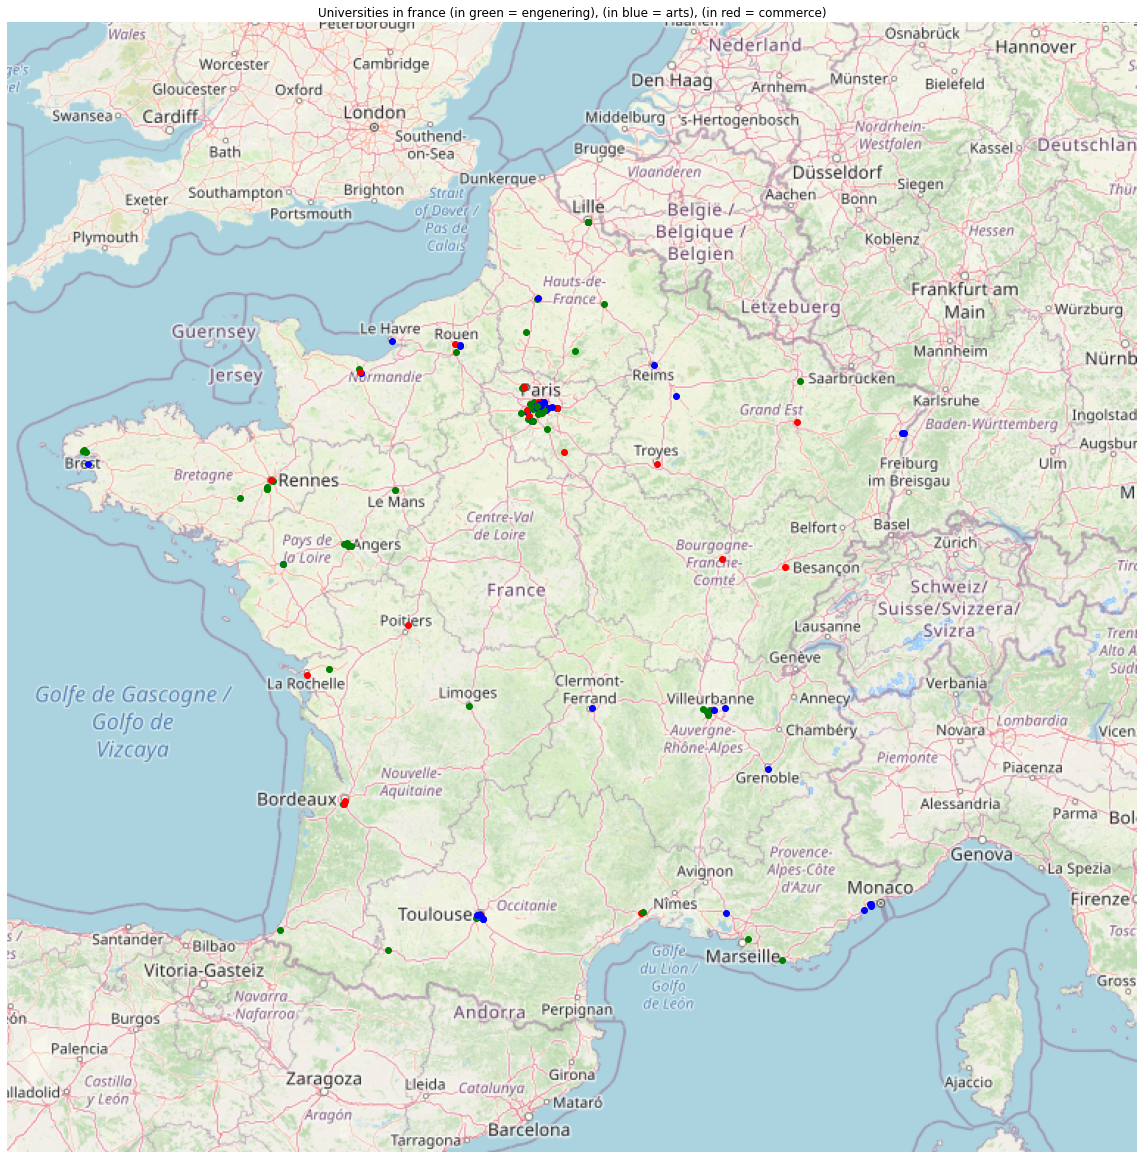

In [71]:
my_map = smopy.Map((45., -1., 48.9, 5.5), z = 6)

ax = my_map.show_mpl(figsize=(16, 16))
ax = fig.add_subplot(111)
for lon, lat, lab in zip(schools_info['x_cor'],schools_info['y_cor'],schools_info['label_2']):
    # We need to convert the coorindates into pixels
    if lab =='commerce':
        x, y = my_map.to_pixels(lon, lat)
        plt.plot(x, y , color = 'red', marker = "o")
    elif lab == 'ingenieur':
        x, y = my_map.to_pixels(lon, lat)
        plt.plot(x, y , color = 'green', marker = "o")
    elif lab == 'artistique':
        x, y = my_map.to_pixels(lon, lat)
        plt.plot(x, y , color = 'blue', marker = "o")
plt.title('Universities in france (in green = engenering), (in blue = arts), (in red = commerce)' )

# Charts

### Statistics on a user base

In [72]:
from matplotlib.pyplot import figure
from matplotlib import cm

In [73]:
# Load csv: users.csv
# plot a pie chart of nationality of the users
users = pd.read_csv("users.csv")

users.head(5)

user_id first_name last_name  gender  birth_date        country
0        1    Janifer    Lagadu  Female  1940-08-09  United States
1        2      Bruis   Danilov    Male  1966-05-28         Brazil
2        3       Omar  Spinozzi    Male  1977-08-28          China
3        4        Mag   Kennedy  Female  1963-11-11          China
4        5     Gerome    Lushey    Male  1990-06-08         Brazil

In [74]:
# counts dataframe for the pie chart
pie_df = users.groupby("country")['user_id'].count().reset_index()
pie_df

country  user_id
0         Brazil       19
1          China       54
2         France       13
3        Germany        1
4          Japan        4
5    New Zealand        1
6        Nigeria        3
7  United States        5

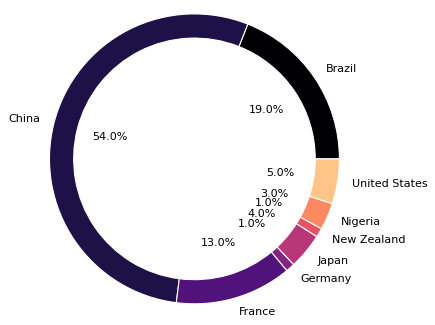

In [75]:
values = pie_df.user_id
labels = pie_df.country

colors = cm.magma(np.arange(8)/8.)

figure(figsize=(5, 5), dpi=80)

my_pie,_,_ = plt.pie(values, radius = 1.2, labels=labels, colors=colors, autopct="%.1f%%")

plt.setp(my_pie, width=0.2, edgecolor='white') 
plt.show()

### Comparing distributions

In [76]:
# Load uncertainty.csv
# create violin plots with seaborn
# 'erroneous' next to 'correct' densities
uncertainty = pd.read_csv("uncertainty.csv")

uncertainty.head(5)

prediction  uncertainty
0    correct     0.208022
1    correct     0.036605
2    correct     0.067507
3    correct     0.035876
4    correct     0.043756

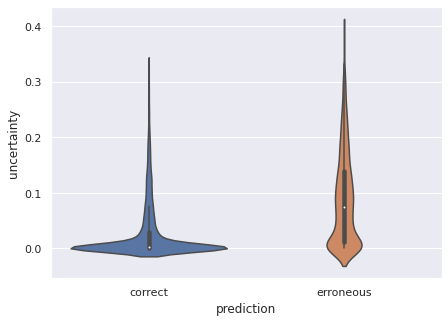

In [77]:
sns.set(rc={'figure.figsize':(7,5)})

ax = sns.violinplot(x="prediction", y="uncertainty", data=uncertainty)